In [20]:
# this is the experiment for the test of classification on Iris through Tensorflow 2.1
import tensorflow as tf
import numpy as np
from sklearn import datasets

x_train = datasets.load_iris().data  # 150 sets of data
y_train = datasets.load_iris().target  # class of data

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

history=model.fit(x_train, y_train, batch_size=32, epochs=300, validation_split=0.2, validation_freq=1)

model.summary()

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 3ms/sample - loss: 1.3023 - sparse_categorical_accuracy: 0.5000 - val_loss: 6.0094 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/300
120/120 [==============================] - 0s 150us/sample - loss: 1.0652 - sparse_categorical_accuracy: 0.7167 - val_loss: 2.5324 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/300
120/120 [==============================] - 0s 158us/sample - loss: 0.6925 - sparse_categorical_accuracy: 0.7583 - val_loss: 2.8606 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/300
120/120 [==============================] - 0s 158us/sample - loss: 0.8394 - sparse_categorical_accuracy: 0.7083 - val_loss: 3.4623 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/300
120/120 [==============================] - 0s 158us/sample - loss: 0.8634 - sparse_categorical_accuracy: 0.7333 - val_loss: 1.0134 - val_sparse_categorical_accuracy: 0.2000
Epoch 6/300
120/

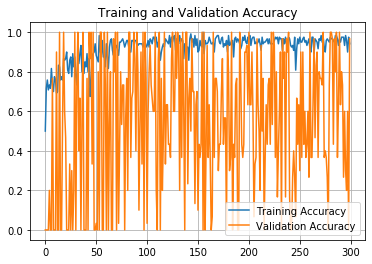

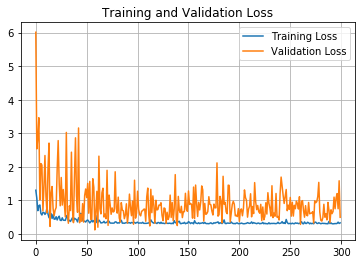

In [22]:
import matplotlib.pyplot as plt
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()

plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Build the network by myself instead of Keras Model

import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

x_data=datasets.load_iris().data
y_data=datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

x_train=x_data[:-30]
y_train=y_data[:-30]
x_test=x_data[-30:]
y_test=y_data[-30:]

x_train=tf.cast(x_train,tf.float32)
x_test=tf.cast(x_test,tf.float32)

train_db=tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_db=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

w1=tf.Variable(tf.random.truncated_normal([4,3],stddev=0.1,seed=1))
b1=tf.Variable(tf.random.truncated_normal([3],stddev=0.1,seed=1))

lr=0.1
train_loss_results=[]
test_acc=[]
epoch=500
loss_all=0

for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y=tf.matmul(x_train,w1)+b1
            y=tf.nn.softmax(y)
            y_=tf.one_hot(y_train,depth=3)
            loss=tf.reduce_mean(tf.square(y-y_))
            loss_all+=loss.numpy()
        grads=tape.gradient(loss,[w1,b1])
        
        w1.assign_sub(lr*grads[0])
        b1.assign_sub(lr*grads[1])
        
    print('epoch {}, loss:{}'.format(epoch,loss_all/4))
    train_loss_results.append(loss_all/4)
    loss_all=0
    
    total_correct, total_number=0,0
    for x_test,y_test in test_db:
        y=tf.matmul(x_test,w1)+b1
        y=tf.nn.softmax(y)
        pred=tf.argmax(y,axis=1)
        pred=tf.cast(pred,dtype=y_test.dtype)
        correct=tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
        correct=tf.reduce_sum(correct)
        total_correct+=int(correct)
        total_number+=x_test.shape[0]
    acc=total_correct/total_number
    test_acc.append(acc)
    print('test_acc:',acc)
    print('-------------')
    
        